<h1>Canada Road Vehicles Collision Predictive Study </h1>

<h2>To better understand this project scope, please, view the Introduction to the problem notebook.</h2>

In [1]:
print("importing the introduction to the problem notebook:")
%run "Introduction to the problem.ipynb"
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

import itertools
import numpy as np
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing


importing the introduction to the problem notebook:
Importing Libraries...
Libraries imported!
car_accident_df imported successfully!
The car_accident_df shape is: (5860405, 22)


In [2]:

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<p>Review on our dataframe information:</p>

In [2]:
car_accident_df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1.0,1.0,20.0,2,2.0,34.0,NaN,1.0,5.0,...,1.0,6.0,1990.0,1.0,M,41.0,11.0,1.0,NaN,1.0
1,1999,1.0,1.0,20.0,2,2.0,34.0,NaN,1.0,5.0,...,2.0,1.0,1987.0,1.0,M,19.0,11.0,1.0,NaN,1.0
2,1999,1.0,1.0,20.0,2,2.0,34.0,NaN,1.0,5.0,...,2.0,1.0,1987.0,2.0,F,20.0,13.0,2.0,2.0,2.0
3,1999,1.0,1.0,8.0,2,1.0,1.0,NaN,5.0,3.0,...,1.0,1.0,1986.0,1.0,M,46.0,11.0,1.0,NaN,1.0
4,1999,1.0,1.0,8.0,2,1.0,1.0,NaN,5.0,3.0,...,99.0,NaN,NaN,1.0,M,5.0,99.0,2.0,NaN,3.0


In [3]:
print("car_accident_df shape is:", car_accident_df.shape)

car_accident_df shape is: (5860405, 22)


<p>The data is too large for our purpose, therefore, we will remove some years to balance it.</p>

In [4]:
droped_years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
for i in droped_years:
    car_accident_df = car_accident_df[car_accident_df.C_YEAR != i]

In [5]:
print("the new car_accident_df shape is:", car_accident_df.shape)

the new car_accident_df shape is: (614670, 22)


In [6]:
print("Describe the df:")
car_accident_df.describe()

Describe the df:


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
count,614670.000000,614620.000000,614616.000000,610288.000000,614670.000000,614615.000000,562371.000000,556866.000000,605389.000000,588952.000000,...,575731.000000,614658.000000,582608.000000,553865.000000,613432.000000,570524.000000,592600.000000,572732.000000,485886.000000,586006.000000
mean,2013.484182,6.716451,3.953695,13.639475,1.984985,2.098131,22.735214,1.692533,1.620039,1.656536,...,10.494809,5.591247,2.277875,2005.762884,1.453155,38.466031,16.809404,1.571599,2.537927,1.501899
std,0.499750,3.464195,1.922382,4.976785,0.121611,1.874702,11.490762,0.830845,1.168549,1.209077,...,8.109468,19.398310,3.690778,5.528375,1.532079,19.006832,19.063968,0.508024,2.252511,0.876654
min,2013.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1911.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000
25%,2013.000000,4.000000,2.000000,10.000000,2.000000,2.000000,21.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2002.000000,1.000000,23.000000,11.000000,1.000000,2.000000,1.000000
50%,2013.000000,7.000000,4.000000,14.000000,2.000000,2.000000,21.000000,2.000000,1.000000,1.000000,...,18.000000,1.000000,1.000000,2006.000000,1.000000,37.000000,11.000000,2.000000,2.000000,1.000000
75%,2014.000000,10.000000,6.000000,17.000000,2.000000,2.000000,35.000000,2.000000,2.000000,2.000000,...,18.000000,2.000000,1.000000,2010.000000,2.000000,52.000000,13.000000,2.000000,2.000000,2.000000
max,2014.000000,12.000000,7.000000,23.000000,2.000000,77.000000,41.000000,10.000000,7.000000,9.000000,...,18.000000,99.000000,23.000000,2015.000000,93.000000,99.000000,99.000000,3.000000,13.000000,5.000000


<h2>Data pre-processing and selection:</h2>

<p>The data for this project was already pre-processed, with all the labels and definitions in conformation to the appended archive "attributes_legend.pdf".</p>

<p>To verify how much non numerical values influence in the dataframe, we will create a function that evaluates the NAn vlaues:</p>

In [7]:
def access_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [8]:
access_NA(car_accident_df)

,Number of NA,Percent NA
P_SAFE,128784,20.95
V_YEAR,60805,9.89
C_RCFG,57804,9.40
C_CONF,52299,8.51
P_AGE,44146,7.18
P_ISEV,41938,6.82
C_TRAF,38939,6.33
C_RALN,38733,6.30
P_SEX,35505,5.78
V_TYPE,32062,5.22


<p>Looking into those values, we see that we can't just use pandas "df.drop_na()" function, since it would drop a big percentage of the data. Therefore, we will use the drop_na function to the velues that represents low percentages of the total (up to 0,2 percent), and substitute the other values with pandas "fill_na()", using the mean values for the columns. For the specific case of the column "P_SEX", qhich is person sex, we will use the dropna approach.</p>

In [9]:
# Impute with mean in the whole df
columns_to_be_changed = ["P_SAFE", "C_RCFG", "V_YEAR", "C_CONF", "C_RALN", "P_AGE", "P_ISEV", "C_TRAF", "V_TYPE", "C_RSUR", "P_USER", "C_WTHR", "P_PSN", "C_HOUR"]
for i in columns_to_be_changed:
 car_accident_df[i] = car_accident_df[i].fillna( int(car_accident_df[i].mean()) )


In [10]:
access_NA(car_accident_df)

,Number of NA,Percent NA
P_SEX,35505,5.78
P_ID,1238,0.20
C_VEHS,55,0.01
C_WDAY,54,0.01
C_MNTH,50,0.01
V_ID,12,0.00


In [11]:
#car_accident_df["P_SEX"].value_counts()
access_NA(car_accident_df)

,Number of NA,Percent NA
P_SEX,35505,5.78
P_ID,1238,0.20
C_VEHS,55,0.01
C_WDAY,54,0.01
C_MNTH,50,0.01
V_ID,12,0.00


<p>Now we drop the other values and we will have our df prepared.</p>

In [12]:
car_accident_df =  car_accident_df.dropna()




In [13]:
car_accident_df["P_SEX"] = car_accident_df["P_SEX"].replace({"F":"1", "M":"2"})

In [14]:
car_accident_df.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
5245735,2013,1.0,1.0,10.0,2,1.0,2.0,3.0,1.0,3.0,...,1.0,1.0,2005.0,1.0,2,75.0,11.0,2.0,2.0,1.0
5245736,2013,1.0,1.0,12.0,2,1.0,4.0,1.0,1.0,5.0,...,1.0,1.0,2005.0,1.0,1,21.0,11.0,2.0,2.0,1.0
5245737,2013,1.0,1.0,0.0,2,1.0,3.0,1.0,7.0,3.0,...,1.0,1.0,2005.0,1.0,1,34.0,11.0,2.0,2.0,1.0
5245738,2013,1.0,1.0,17.0,2,2.0,21.0,1.0,1.0,1.0,...,1.0,1.0,2005.0,1.0,1,50.0,11.0,2.0,2.0,1.0
5245739,2013,1.0,1.0,17.0,2,2.0,21.0,1.0,1.0,1.0,...,2.0,1.0,2005.0,1.0,2,63.0,11.0,1.0,2.0,1.0


In [15]:
#Make sure there isn't any other N/A values:
access_NA(car_accident_df)

,Number of NA,Percent NA


<p>Now, the data is ready to be used in some visualization techniques.</p>

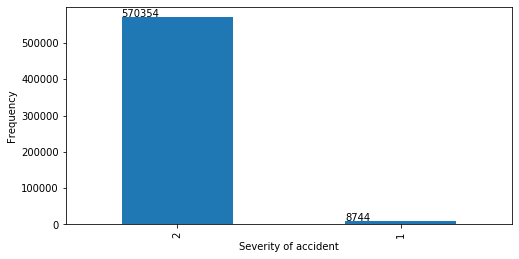

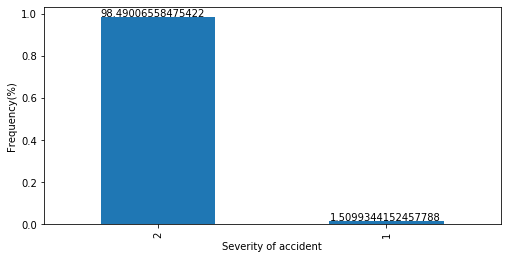

In [16]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax = car_accident_df['C_SEV'].value_counts().plot(kind='bar')
ax.set_xlabel("Severity of accident")
ax.set_ylabel("Frequency")
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

fig1 = plt.figure(figsize=(18,4))
ax1 = fig1.add_subplot(1,2,1)
ax1 = car_accident_df['C_SEV'].value_counts(normalize=True).plot(kind='bar')
ax1.set_xlabel("Severity of accident")
ax1.set_ylabel("Frequency(%)")
for p in ax1.patches:
    ax1.annotate(str(float(p.get_height()*100)), (p.get_x() * 1.005, p.get_height() * 1.005))


<p>Those graph makes it visible that fortunately, the amount of fatal victims is rather small if compared with non fatal accidents.  </p>

<h3>Methodology</h3>

<p>Since the problem is a classification problem, with values being categorical, the method that will be selected is the K Nearest Neighbors.</p>
<p>Therefore, the next step is to normalize the data.</p>
<p>To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:</p>

In [17]:
X = car_accident_df.drop("C_SEV", axis= 1).values

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.9630845 , -1.64293281, -1.53662041, -0.7354283 , -0.57413915,
        -1.88185356,  1.69445392, -0.52823923,  1.18099849,  0.63732075,
         0.96482401, -0.24016294, -0.34753029, -0.13320341, -0.29220835,
         0.9103136 ,  1.94523109, -0.3089182 ,  0.8696502 , -0.21157289,
        -0.56774818],
       [-0.9630845 , -1.64293281, -1.53662041, -0.33057824, -0.57413915,
        -1.69925303, -0.76654925, -0.52823923,  2.88858037, -0.4245315 ,
        -0.05315584, -0.24016294, -0.34753029, -0.13320341, -0.29220835,
        -1.09852253, -0.9280986 , -0.3089182 ,  0.8696502 , -0.21157289,
        -0.56774818],
       [-0.9630845 , -1.64293281, -1.53662041, -2.75967862, -0.57413915,
        -1.7905533 , -0.76654925,  4.62150079,  1.18099849, -0.4245315 ,
        -0.05315584, -0.24016294, -0.34753029, -0.13320341, -0.29220835,
        -1.09852253, -0.23637108, -0.3089182 ,  0.8696502 , -0.21157289,
        -0.56774818],
       [-0.9630845 , -1.64293281, -1.53662041,  0.68154692

In [19]:
y = car_accident_df["C_SEV"].values

<p>Preparing the training and test sets:</p>

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (463278, 21) (463278,)
Test set: (115820, 21) (115820,)


<h2>K-Nearest-Neighbor</h2>

In [21]:
from sklearn.neighbors import KNeighborsClassifier

<p>for now, starting with k = 4 :</p>

In [22]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [23]:
yhat = neigh.predict(X_test)


In [40]:
yhat

array([2, 2, 2, ..., 2, 2, 2])

<h3>Accuracy evaluation</h3>
<p>In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.</p>

In [25]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.992479677429103
Test set Accuracy:  0.9892160248661717


<h2>Logistic Regression</h2>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<p>Test set:</p>

In [27]:
yhat = LR.predict(X_test)


array([2, 2, 2, ..., 2, 2, 2])

In [36]:
yhat

array([2, 2, 2, ..., 2, 2, 2])

<p>predict_prob returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):</p>

In [28]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[8.98810149e-04, 9.99101190e-01],
       [6.96490184e-03, 9.93035098e-01],
       [1.17854159e-03, 9.98821458e-01],
       ...,
       [6.08784175e-04, 9.99391216e-01],
       [1.71696658e-03, 9.98283033e-01],
       [4.06063226e-02, 9.59393677e-01]])

In [59]:
yhat_prob[9]

array([0.51, 0.49])

<h2>Evaluation</h2>

<h2>jaccard index</h2>

<p>Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.</p>

In [29]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/home/kurosuzume/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9861422897599724

<h2>Confusion Matrix</h2>

<p>Confusion Matrix function:</p>

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[114048     11]
 [  1594    167]]


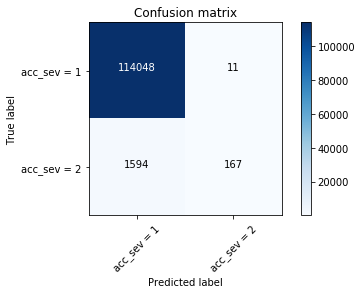

In [44]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['acc_sev = 1','acc_sev = 2'],normalize= False,  title='Confusion matrix')

In [42]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           1       0.94      0.09      0.17      1761
           2       0.99      1.00      0.99    114059

    accuracy                           0.99    115820
   macro avg       0.96      0.55      0.58    115820
weighted avg       0.99      0.99      0.98    115820



<h2>Log Loss</h2>

<p>Now, lets try **log loss** for evaluation. In logistic regression, the output can be the probability of the accident severity to be 1 or 2. This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. </p>

In [43]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.062028283999958043

<h2>Decision Trees</h2>